<h2>What is Model Development?</h2>
<p>Model development is the process of designing, training, testing, and refining a machine learning or statistical model to solve a specific problem using data.</p>

<p>In this section, we will develop several models that will predict the price of the car using the variables or features. This is just an estimate but should give us an objective idea of how much the car should cost.</p>

Some questions we want to ask in this module
<ul>
    <li>Do I know if the dealer is offering fair value for my trade-in?</li>
    <li>Do I know if I put a fair value on my car?</li>
</ul>
<p>In data analytics, we often use <b>Model Development</b> to help us predict future observations from the data we have.</p>

<p>A model will help us understand the exact relationship between different variables and how these variables are used to predict the result.</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline

import os

for dirname, _, filenames in os.walk('/kaggle/input/cleaned-used-car-datasett'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/cleaned-used-car-datasett/cleaned_used_car_dataset.csv


In [2]:
df = pd.read_csv('/kaggle/input/cleaned-used-car-datasett/cleaned_used_car_dataset.csv')
df

,Unnamed: 0,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,city-mpg,highway-L/100km,price,city-L/100km,highway-L/100km.1,horsepower-binned,diesel,gas,aspiration-std,aspiration-turbo
0,0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,...,21,27,16500.0,11.190476,8.703704,Low,0,1,1,0
1,1,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,...,19,26,16500.0,12.368421,9.038462,Medium,0,1,1,0
2,2,2,164,audi,four,sedan,fwd,front,99.8,0.848630,...,24,30,13950.0,9.791667,7.833333,Low,0,1,1,0
3,3,2,164,audi,four,sedan,4wd,front,99.4,0.848630,...,18,22,17450.0,13.055556,10.681818,Low,0,1,1,0
4,4,2,122,audi,two,sedan,fwd,front,99.8,0.851994,...,19,25,15250.0,12.368421,9.400000,Low,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,-1,95,volvo,four,sedan,rwd,front,109.1,0.907256,...,23,28,16845.0,10.217391,8.392857,Low,0,1,1,0
196,196,-1,95,volvo,four,sedan,rwd,front,109.1,0.907256,...,19,25,19045.0,12.368421,9.400000,Medium,0,1,0,1
197,197,-1,95,volvo,four,sedan,rwd,front,109.1,0.907256,...,18,23,21485.0,13.055556,10.217391,Medium,0,1,1,0
198,198,-1,95,volvo,four,sedan,rwd,front,109.1,0.907256,...,26,27,22470.0,9.038462,8.703704,Low,1,0,0,1


In [3]:
df.drop('Unnamed: 0', axis =1, inplace= True)

In [4]:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm             float64
city-mpg               int64
highway-L/100km        int64
price                float64
city-L/100km         float64
highway-L/100km.1    float64
horsepower-binned     object
diesel                 int64
gas                    int64
aspiration-std         int64
aspiration-turbo       int64
dtype: object

<h2>Linear Regression and Multiple Linear Regression</h2>

<p>One example of a Data  Model that we will be using is:</p>
<b>Simple Linear Regression</b>

<br>
<p>Simple Linear Regression is a method to help us understand the relationship between two variables:</p>
<ul>
    <li>The predictor/independent variable (X)</li>
    <li>The response/dependent variable (that we want to predict)(Y)</li>
</ul>

<p>The result of Linear Regression is a <b>linear function</b> that predicts the response (dependent) variable as a function of the predictor (independent) variable.</p>

 <b>Linear Function</b>
$$
Yhat = a + b  X
$$


<ul>
    <li>a refers to the <b>intercept</b> of the regression line, in other words: the value of Y when X is 0</li>
    <li>b refers to the <b>slope</b> of the regression line, in other words: the value with which Y changes when X increases by 1 unit</li>
</ul>

In [5]:
# load linear model from sklearn
from sklearn.linear_model import LinearRegression

In [6]:
# create linear regression object
lm = LinearRegression()

<h4>How could "highway-mpg" help us predict car price?</h4>

we want to look at how highway-L/100km can help us predict car price.
Using simple linear regression, we will create a linear function with "highway-L/100km" as the predictor variable and the "price" as the response variable.


In [7]:
X = df[['highway-L/100km']]
Y = df['price']

In [8]:
# fit model
lm.fit(X,Y)

LinearRegression()

In [9]:
# make prediction
Yhat = lm.predict(X)

In [10]:
Yhat[0:5]   

array([16254.26934067, 17077.0977727 , 13785.78404458, 20368.41150083,
       17899.92620473])

<h4>What is the value of the intercept (a)?</h4>

In [11]:
lm.intercept_

38470.63700549667

<h4>What is the value of the slope (b)?</h4>

In [12]:
lm.coef_

array([-822.82843203])

<h3>What is the final estimated linear model we get?</h3>

As we saw above, we should get a final linear model with the structure:

$$
Yhat = a + b  X
$$

Plugging in the actual values we get:

<b>Price</b> = 38470.63 - 822.82 x <b>highway-L/100km</b>

In [13]:
lm1 = LinearRegression()
lm1

LinearRegression()

In [14]:
X = df[['engine-size']]
Y = df['price']

In [15]:
lm1.fit(X,Y)

LinearRegression()

In [16]:
lm1.coef_

array([166.8621392])

In [17]:
lm.intercept_

38470.63700549667

# Multiple Linear Regression

<p>What if we want to predict car price using more than one variable?</p>

<p>If we want to use more variables in our model to predict car price, we can use <b>Multiple Linear Regression</b>.
Multiple Linear Regression is very similar to Simple Linear Regression, but this method is used to explain the relationship between one continuous response (dependent) variable and <b>two or more</b> predictor (independent) variables.
Most of the real-world regression models involve multiple predictors. We will illustrate the structure by using four predictor variables, but these results can generalize to any integer:</p>

<ul>
    <li>Y: Response  Variable</li>
    <li>X_1: Predictor Variable 1</li>
    <li>X_2: Predictor Variable 2</li>
    <li>X_3: Predictor Variable 3</li>
    <li>X_4: Predictor Variable 4</li>
</ul>




<ul>
    <li>a: intercept</li>
    <li>b_1 :coefficients of Variable 1</li>
    <li>b_2 :coefficients of Variable 2</li>
    <li>b_3 :coefficients of Variable 3</li>
    <li>b_4 :coefficients of Variable 4</li>
   
</ul>


The equation is given by:
$$
Yhat = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4
$$


<p>From the previous section  we know that other good predictors of price could be:</p>
<ul>
    <li>Horsepower</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Highway-L/100km</li>
</ul>
Let's develop a model using these variables as the predictor variables.

In [18]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-L/100km']]

In [19]:
lm.fit(Z, df['price'])

LinearRegression()

In [20]:
lm.intercept_

-15794.354371209747

In [21]:
lm.coef_

array([53.5112049 ,  4.70487452, 81.53080659, 35.87654175])

What is the final estimated linear model that we get?

As we saw above, we should get a final linear function with the structure:

$$
Yhat = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4
$$

What is the linear function we get in this example?

<b>Price</b> = -15794.35437120975 + 53.5112049  x <b>horsepower</b> + 4.70487452 x <b>curb-weight</b> + 81.53080659 x <b>engine-size</b> + 35.87654175 x <b>highway-L/100km</b>

In [22]:
lm2 = LinearRegression()
lm2.fit(df[['normalized-losses', 'highway-L/100km']], df['price'])

LinearRegression()

In [23]:
lm2.coef_

array([   1.45409594, -821.58496582])

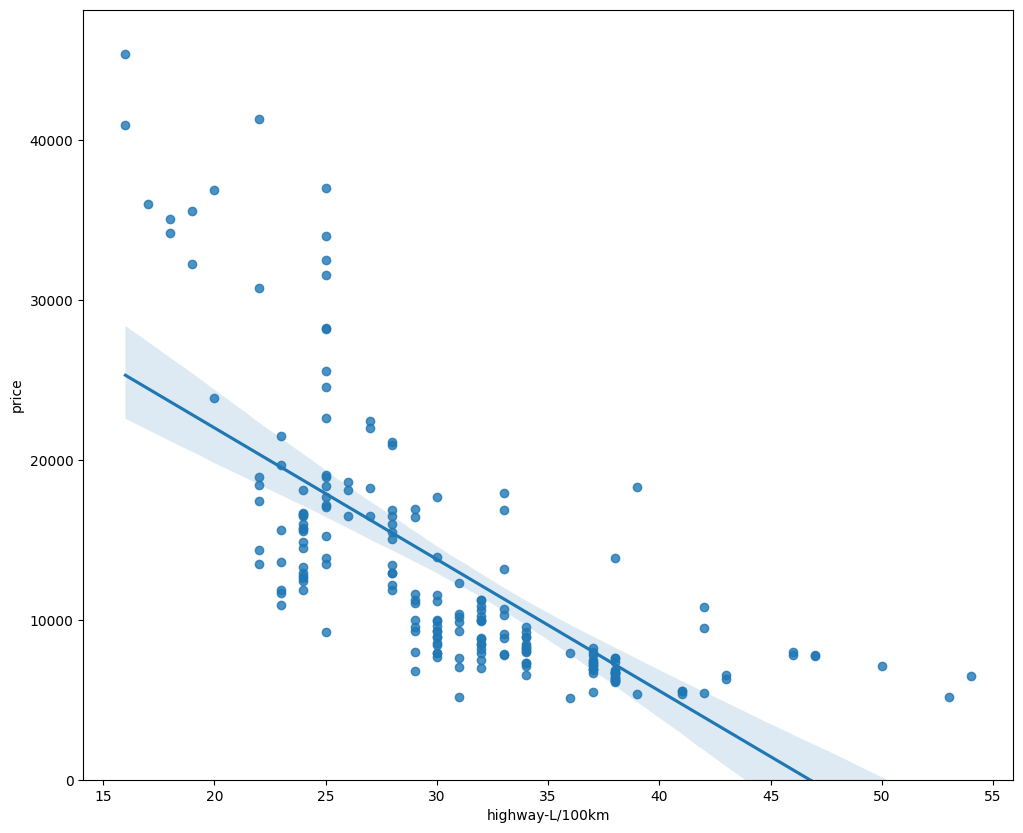

In [24]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-L/100km", y="price", data=df)
plt.ylim(0,)
plt.show()

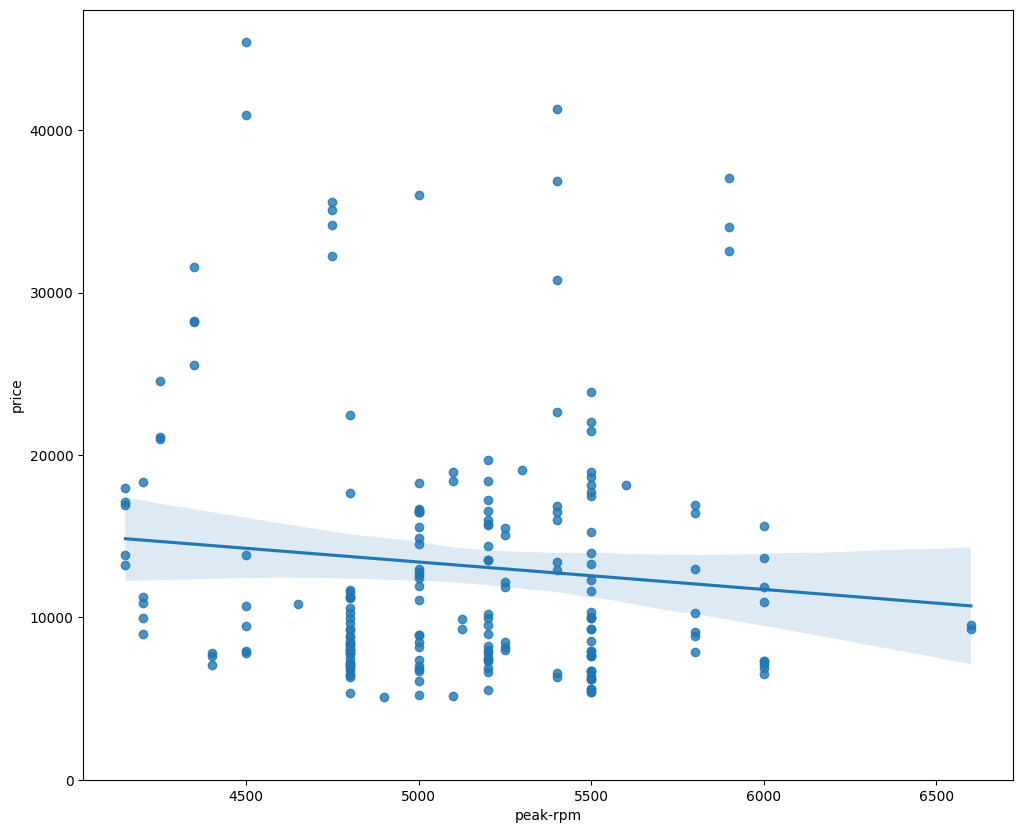

In [25]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)
plt.show()

In [26]:
df[["peak-rpm","highway-L/100km","price"]].corr()


,peak-rpm,highway-L/100km,price
peak-rpm,1.000000,-0.059319,-0.101593
highway-L/100km,-0.059319,1.000000,-0.705115
price,-0.101593,-0.705115,1.000000


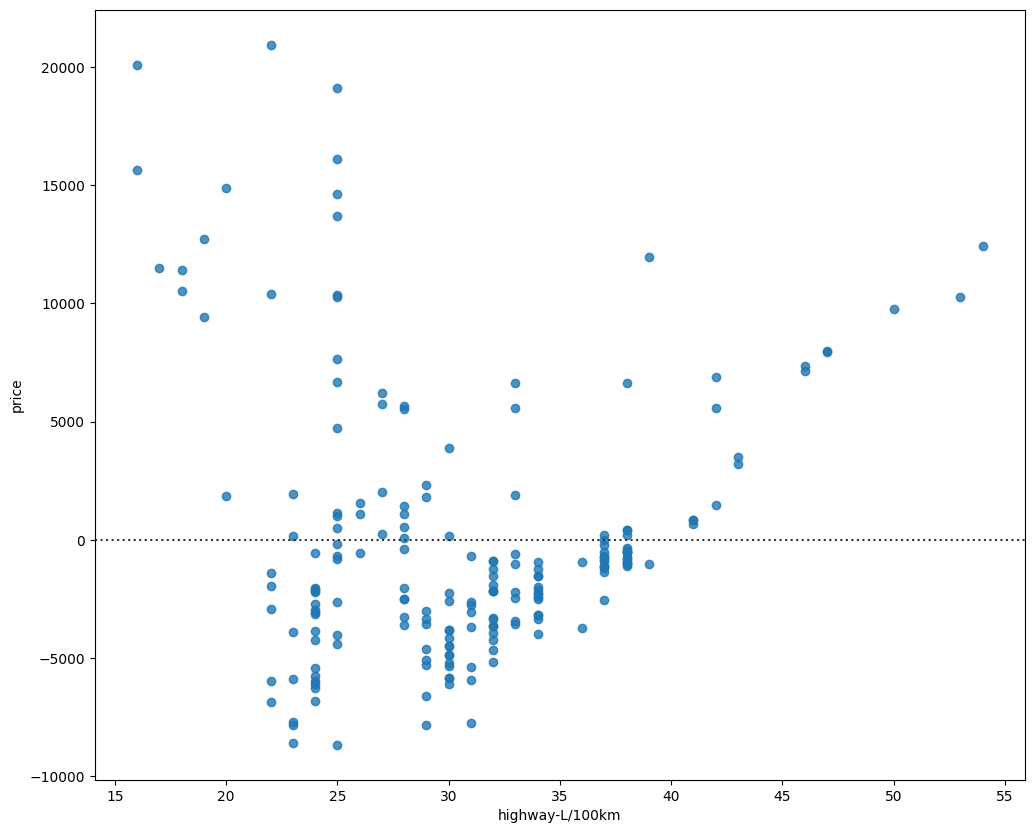

In [27]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-L/100km'], y=df['price'])
plt.show()

In [28]:
Y_hat = lm.predict(Z)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


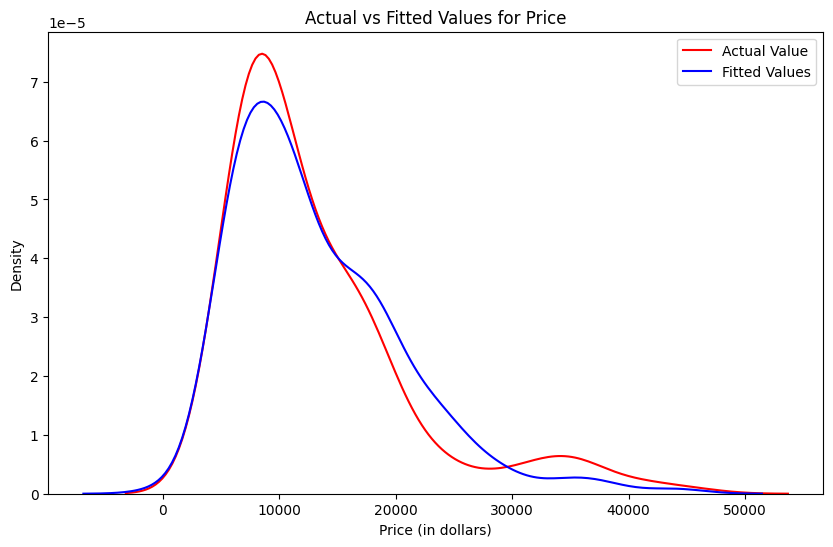

In [29]:

plt.figure(figsize=(10, 6))


ax1 = sns.kdeplot(data=df['price'], color="r", label="Actual Value")
sns.kdeplot(data=Y_hat, color="b", label="Fitted Values", ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Density')
plt.legend()

plt.show()
plt.close()

In [30]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [31]:
x = df['highway-L/100km']
y = df['price']

In [32]:
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.552 x + 204.2 x - 8948 x + 1.378e+05


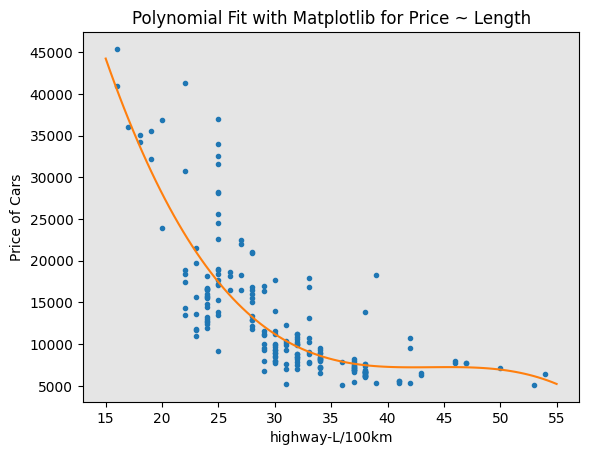

In [33]:
PlotPolly(p, x, y, 'highway-L/100km')

In [34]:
np.polyfit(x, y, 3)

array([-1.55173297e+00,  2.04232144e+02, -8.94817574e+03,  1.37751367e+05])

            11             10             9           8         7
-1.273e-08 x  + 4.839e-06 x  - 0.0008229 x + 0.08259 x - 5.432 x
          6        5             4             3            2
 + 245.6 x - 7786 x + 1.729e+05 x - 2.634e+06 x + 2.62e+07 x - 1.532e+08 x + 3.987e+08


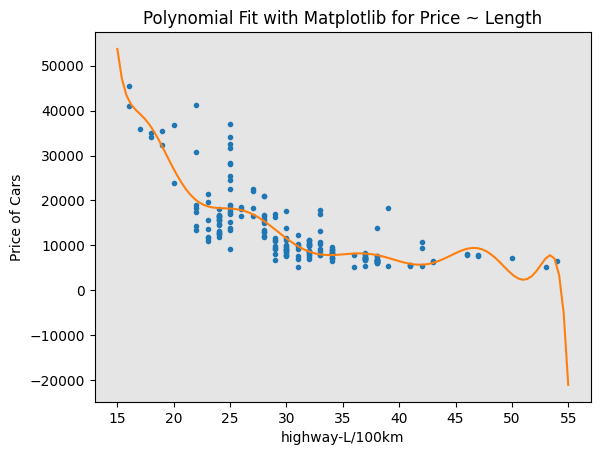

In [35]:
f1 = np.polyfit(x,y,11)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1,x,y, 'highway-L/100km')

In [36]:
from sklearn.preprocessing import PolynomialFeatures

In [37]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [38]:
Z_pr=pr.fit_transform(Z)

In [39]:
Z.shape

(200, 4)

In [40]:
Z_pr.shape

(200, 15)

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [42]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [43]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [44]:
Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [45]:
Input=[('scale',StandardScaler()),('model',LinearRegression())]

pipe=Pipeline(Input)

pipe.fit(Z,y)

ypipe=pipe.predict(Z)
ypipe[0:10]

array([13701.08113673, 19053.70464401, 10622.23445554, 15523.47345497,
       13872.10183248, 15457.64454615, 15975.18074348, 17614.52358563,
       10724.19862453, 10724.19862453])

# Measures for In-Sample Evaluation

In [46]:
#highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.7609714051425501


In [47]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [13729.63711709 17400.60417954 10225.53219385 14730.80995231]


In [48]:
from sklearn.metrics import mean_squared_error

In [49]:
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  15095957.759716928


In [50]:
# fit the model 
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093753249041752


In [51]:
Y_predict_multifit = lm.predict(Z)

In [52]:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  12038986.569462512


In [53]:
from sklearn.metrics import r2_score

In [54]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.6742706265540412


In [55]:
mean_squared_error(df['price'], p(x))

20571584.188794386

In [56]:
new_input=np.arange(1, 100, 1).reshape(-1, 1)

In [57]:
lm.fit(X, Y)
lm

LinearRegression()

In [58]:
yhat=lm.predict(new_input)
yhat[0:5]

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-7795.57883996, -7628.71670076, -7461.85456156, -7294.99242236,
       -7128.13028315])

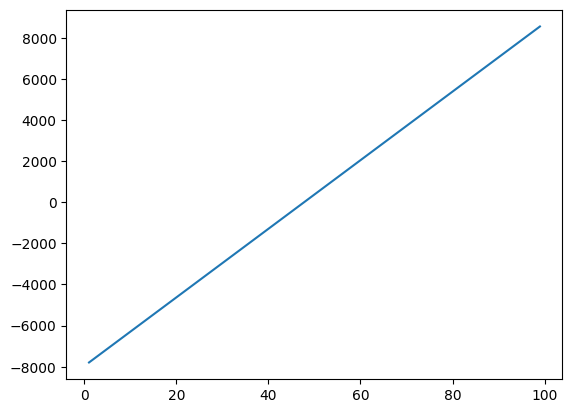

In [59]:
plt.plot(new_input, yhat)
plt.show()